In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv(r"D:\Documents\Coding\Python\Files\WorldCupMatches.csv")

data.head(10)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [2]:
print(f"Shape of the dataset: {data.shape}")


Shape of the dataset: (4572, 20)


In [3]:
data.describe()


,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [4]:
data.columns


Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [5]:
print(f"Maximum attendance: {data['Attendance'].max()}")
print(f"Minimum attendance: {data['Attendance'].min()}")


Maximum attendance: 173850.0
Minimum attendance: 2000.0


In [6]:
data.isnull()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4568,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4569,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4570,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
data.isnull().sum()


Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [8]:
# Display rows with any NaN values

rows_with_nan = data[data.isnull().any(axis=1)]

rows_with_nan


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# List all columns containing numeric values
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns:", numeric_columns)


Numeric columns: ['Year', 'Home Team Goals', 'Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'RoundID', 'MatchID']


In [10]:
# List all columns containing string values
string_columns = data.select_dtypes(include=[object]).columns.tolist()

print("String columns:", string_columns)


String columns: ['Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Away Team Name', 'Win conditions', 'Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials']


In [11]:
# Set display option to show numbers in standard decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the mean for all columns again
mean_values = data.mean(numeric_only=True)
print("Mean values for each column:\n")
print(mean_values)


Mean values for each column:

Year                       1985.09
Home Team Goals               1.81
Away Team Goals               1.02
Attendance                45164.80
Half-time Home Goals          0.71
Half-time Away Goals          0.43
RoundID                10661772.59
MatchID                61346867.55
dtype: float64


In [12]:
data_mean = data.copy() # To copy the data in data_mean

# Replace NaN fields with mean for numerical columns
for column in data_mean.select_dtypes(include=[np.number]).columns:
    data_mean[column] = data_mean[column].fillna(data_mean[column].mean())

data_mean

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.00,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.00,1.00,Mexico,,4444.00,3.00,0.00,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.00,1096.00,FRA,MEX
1,1930.00,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.00,0.00,Belgium,,18346.00,2.00,0.00,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.00,1090.00,USA,BEL
2,1930.00,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.00,1.00,Brazil,,24059.00,2.00,0.00,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.00,1093.00,YUG,BRA
3,1930.00,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.00,1.00,Peru,,2549.00,1.00,0.00,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.00,1098.00,ROU,PER
4,1930.00,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.00,0.00,France,,23409.00,0.00,0.00,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.00,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,1985.09,NaN,NaN,NaN,NaN,NaN,1.81,1.02,NaN,NaN,45164.80,0.71,0.43,NaN,NaN,NaN,10661772.59,61346867.55,NaN,NaN
4568,1985.09,NaN,NaN,NaN,NaN,NaN,1.81,1.02,NaN,NaN,45164.80,0.71,0.43,NaN,NaN,NaN,10661772.59,61346867.55,NaN,NaN
4569,1985.09,NaN,NaN,NaN,NaN,NaN,1.81,1.02,NaN,NaN,45164.80,0.71,0.43,NaN,NaN,NaN,10661772.59,61346867.55,NaN,NaN
4570,1985.09,NaN,NaN,NaN,NaN,NaN,1.81,1.02,NaN,NaN,45164.80,0.71,0.43,NaN,NaN,NaN,10661772.59,61346867.55,NaN,NaN


In [13]:
# Calculate the median for all columns
median_values = data.median(numeric_only=True)
print("Median values for each column:\n")

print(median_values)


Median values for each column:

Year                    1990.00
Home Team Goals            2.00
Away Team Goals            1.00
Attendance             41579.50
Half-time Home Goals       0.00
Half-time Away Goals       0.00
RoundID                  337.00
MatchID                 2191.00
dtype: float64


In [14]:
# Replace NaN fields with median for numerical columns
data_median = data.copy()

for column in data_median.select_dtypes(include=[np.number]).columns:
    data_median[column] = data_median[column].fillna(data_median[column].median())

data_median


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.00,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.00,1.00,Mexico,,4444.00,3.00,0.00,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.00,1096.00,FRA,MEX
1,1930.00,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.00,0.00,Belgium,,18346.00,2.00,0.00,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.00,1090.00,USA,BEL
2,1930.00,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.00,1.00,Brazil,,24059.00,2.00,0.00,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.00,1093.00,YUG,BRA
3,1930.00,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.00,1.00,Peru,,2549.00,1.00,0.00,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.00,1098.00,ROU,PER
4,1930.00,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.00,0.00,France,,23409.00,0.00,0.00,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.00,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,1990.00,NaN,NaN,NaN,NaN,NaN,2.00,1.00,NaN,NaN,41579.50,0.00,0.00,NaN,NaN,NaN,337.00,2191.00,NaN,NaN
4568,1990.00,NaN,NaN,NaN,NaN,NaN,2.00,1.00,NaN,NaN,41579.50,0.00,0.00,NaN,NaN,NaN,337.00,2191.00,NaN,NaN
4569,1990.00,NaN,NaN,NaN,NaN,NaN,2.00,1.00,NaN,NaN,41579.50,0.00,0.00,NaN,NaN,NaN,337.00,2191.00,NaN,NaN
4570,1990.00,NaN,NaN,NaN,NaN,NaN,2.00,1.00,NaN,NaN,41579.50,0.00,0.00,NaN,NaN,NaN,337.00,2191.00,NaN,NaN


In [15]:
# Replace NaN fields with 'default' for string columns
data_default = data.copy()

for column in data_default.select_dtypes(include=[object]).columns:
    data_default[column] = data_default[column].fillna('default')

data_default

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.00,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.00,1.00,Mexico,,4444.00,3.00,0.00,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.00,1096.00,FRA,MEX
1,1930.00,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.00,0.00,Belgium,,18346.00,2.00,0.00,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.00,1090.00,USA,BEL
2,1930.00,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.00,1.00,Brazil,,24059.00,2.00,0.00,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.00,1093.00,YUG,BRA
3,1930.00,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.00,1.00,Peru,,2549.00,1.00,0.00,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.00,1098.00,ROU,PER
4,1930.00,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.00,0.00,France,,23409.00,0.00,0.00,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.00,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,default,default,default,default,default,NaN,NaN,default,default,NaN,NaN,NaN,default,default,default,NaN,NaN,default,default
4568,NaN,default,default,default,default,default,NaN,NaN,default,default,NaN,NaN,NaN,default,default,default,NaN,NaN,default,default
4569,NaN,default,default,default,default,default,NaN,NaN,default,default,NaN,NaN,NaN,default,default,default,NaN,NaN,default,default
4570,NaN,default,default,default,default,default,NaN,NaN,default,default,NaN,NaN,NaN,default,default,default,NaN,NaN,default,default


In [16]:
# Combining the data_mean and data_default DataFrames
# Update data_mean with non-numeric columns from data_default

for column in data_default.select_dtypes(include=[object]).columns:
    data_mean[column] = data_default[column]

data_mean


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.00,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.00,1.00,Mexico,,4444.00,3.00,0.00,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.00,1096.00,FRA,MEX
1,1930.00,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.00,0.00,Belgium,,18346.00,2.00,0.00,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.00,1090.00,USA,BEL
2,1930.00,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.00,1.00,Brazil,,24059.00,2.00,0.00,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.00,1093.00,YUG,BRA
3,1930.00,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.00,1.00,Peru,,2549.00,1.00,0.00,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.00,1098.00,ROU,PER
4,1930.00,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.00,0.00,France,,23409.00,0.00,0.00,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.00,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,1985.09,default,default,default,default,default,1.81,1.02,default,default,45164.80,0.71,0.43,default,default,default,10661772.59,61346867.55,default,default
4568,1985.09,default,default,default,default,default,1.81,1.02,default,default,45164.80,0.71,0.43,default,default,default,10661772.59,61346867.55,default,default
4569,1985.09,default,default,default,default,default,1.81,1.02,default,default,45164.80,0.71,0.43,default,default,default,10661772.59,61346867.55,default,default
4570,1985.09,default,default,default,default,default,1.81,1.02,default,default,45164.80,0.71,0.43,default,default,default,10661772.59,61346867.55,default,default


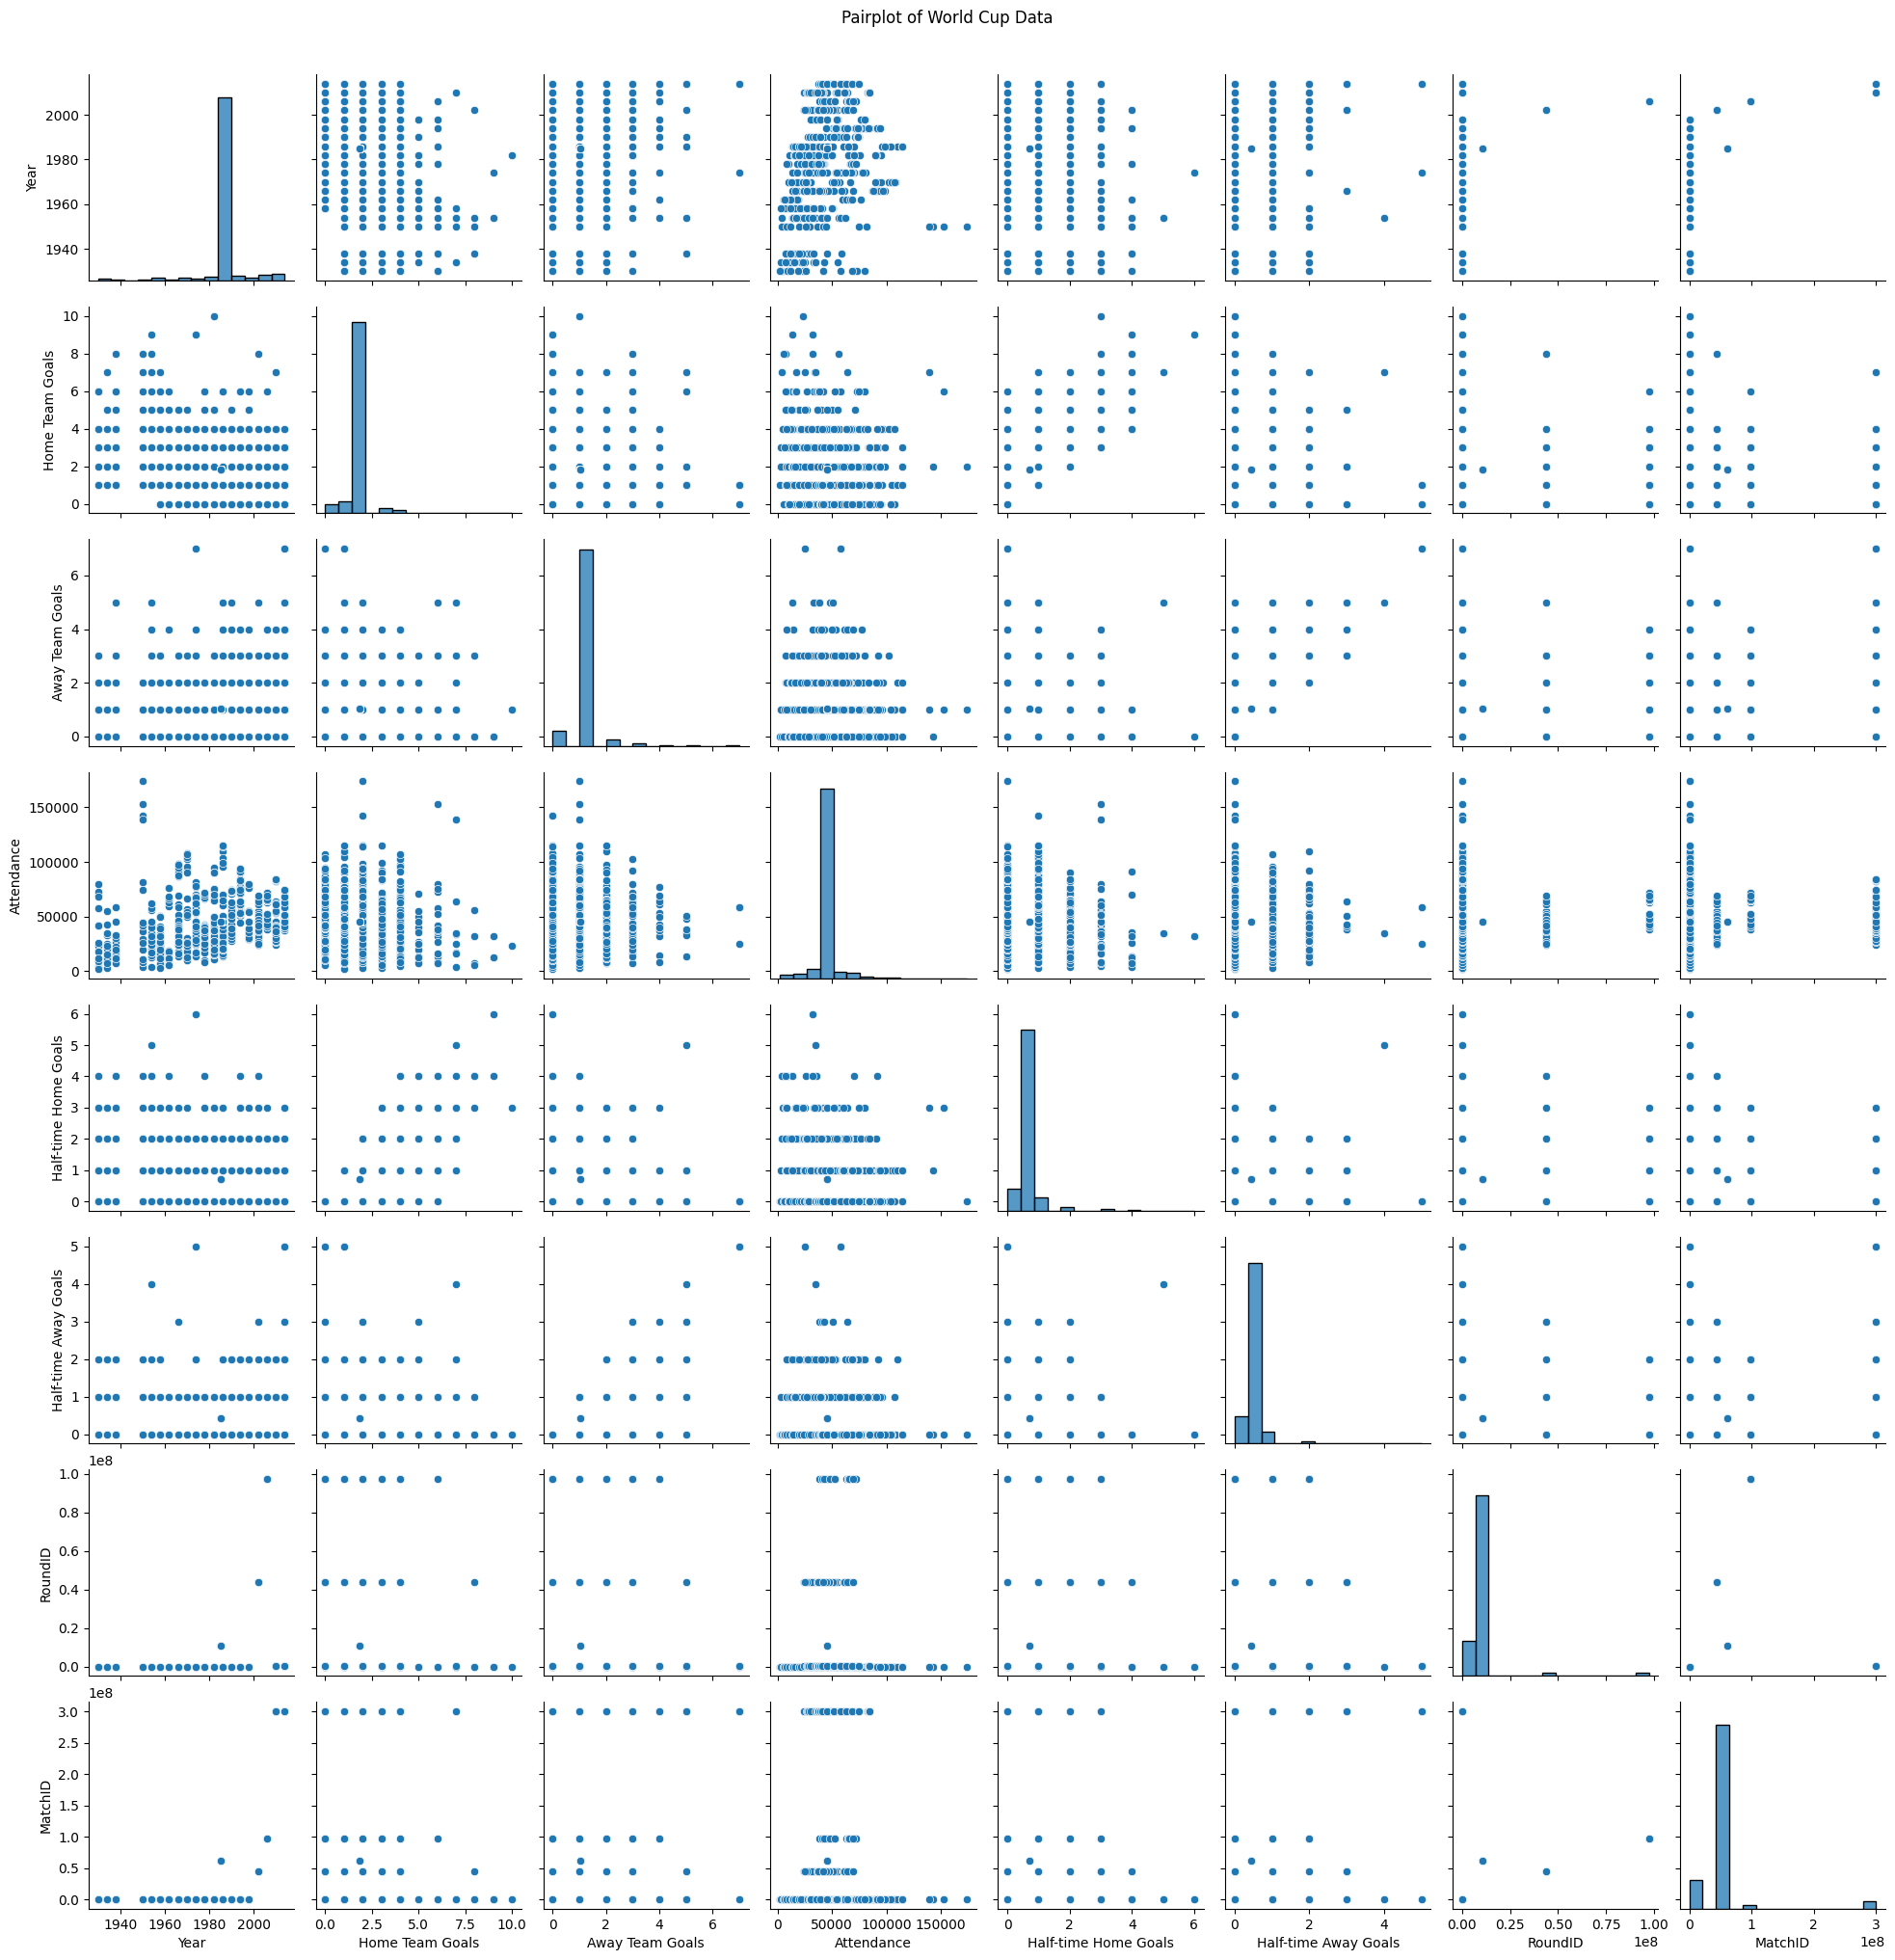

In [17]:
# Pairplot to visualize pairwise relationships
sns.pairplot(data_mean)
plt.suptitle('Pairplot of World Cup Data', y=1.02)
plt.show()


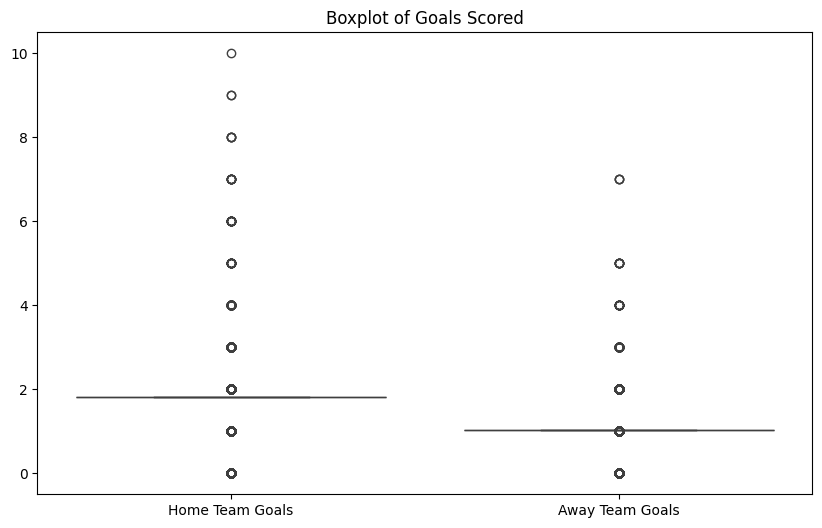

In [18]:
# Boxplot to visualize distribution of goals scored
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_mean[['Home Team Goals', 'Away Team Goals']])
plt.title('Boxplot of Goals Scored')
plt.show()


                 Year  Home Team Goals  Away Team Goals  Attendance  RoundID
Year             1.00            -0.38             0.08        0.31     0.34
Home Team Goals -0.38             1.00             0.01       -0.12    -0.11
Away Team Goals  0.08             0.01             1.00       -0.03    -0.01
Attendance       0.31            -0.12            -0.03        1.00     0.07
RoundID          0.34            -0.11            -0.01        0.07     1.00


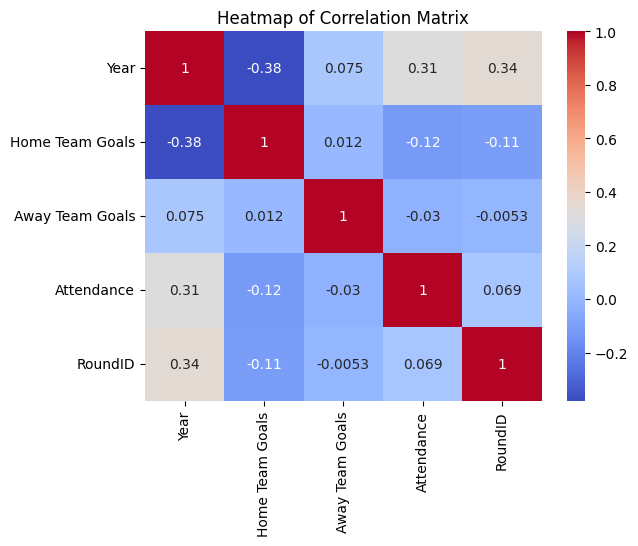

In [19]:
# Heatmap to visualize correlation matrix
corr_data = data[['Year', 'Home Team Goals', 'Away Team Goals', 'Attendance', 'RoundID']].corr()
print(corr_data)
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


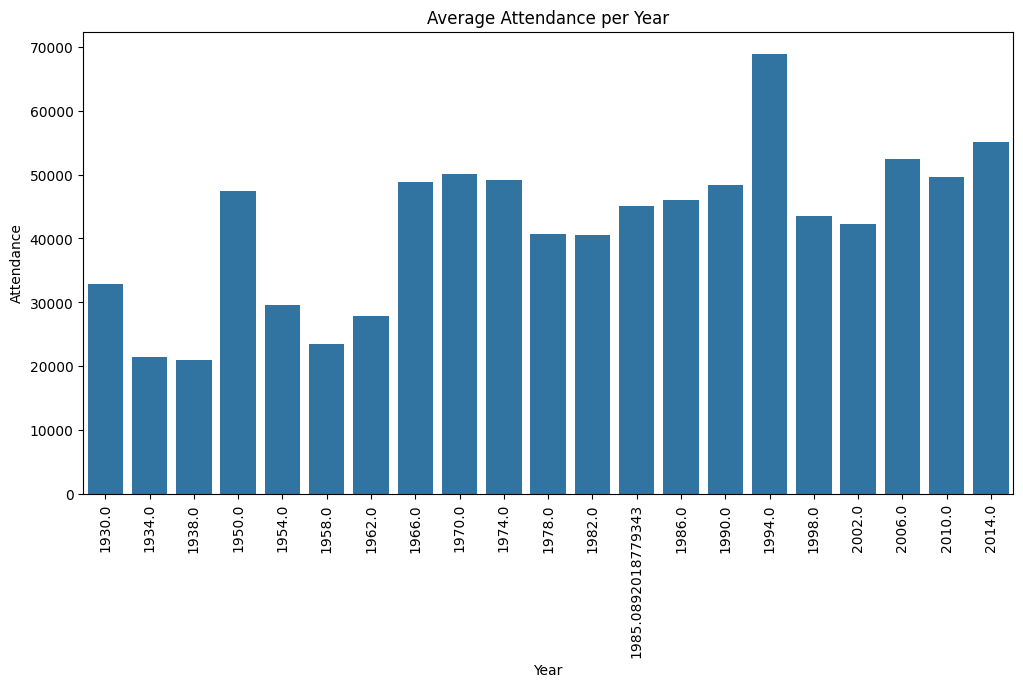

In [20]:
# Barplot for average attendance per year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Attendance', data=data_mean, estimator=np.mean, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Attendance per Year')
plt.show()


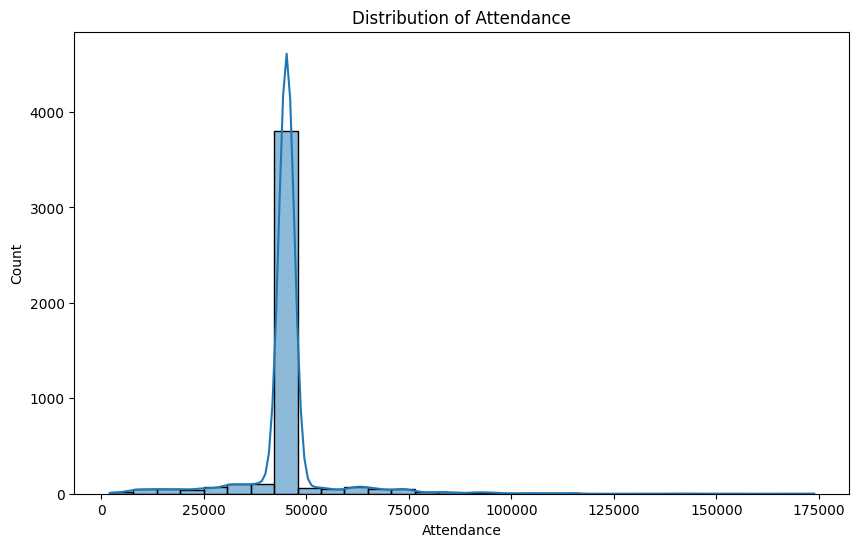

In [21]:
# Histogram to visualize distribution of attendance
plt.figure(figsize=(10, 6))
sns.histplot(data_mean['Attendance'], bins=30, kde=True)
plt.title('Distribution of Attendance')
plt.show()


<Figure size 1000x600 with 0 Axes>

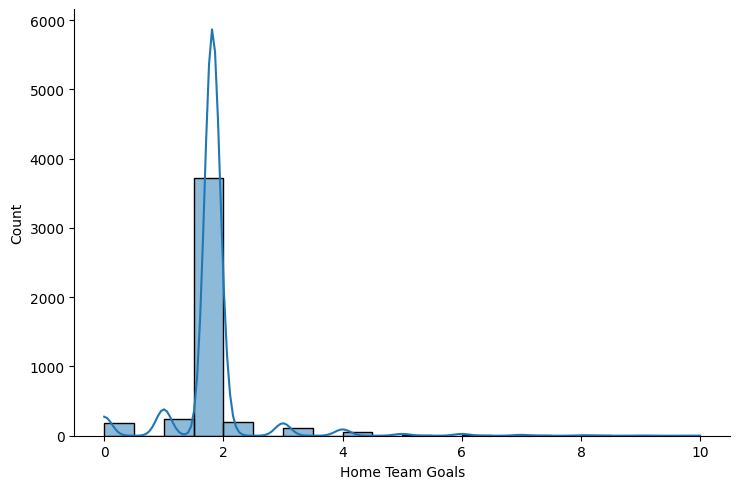

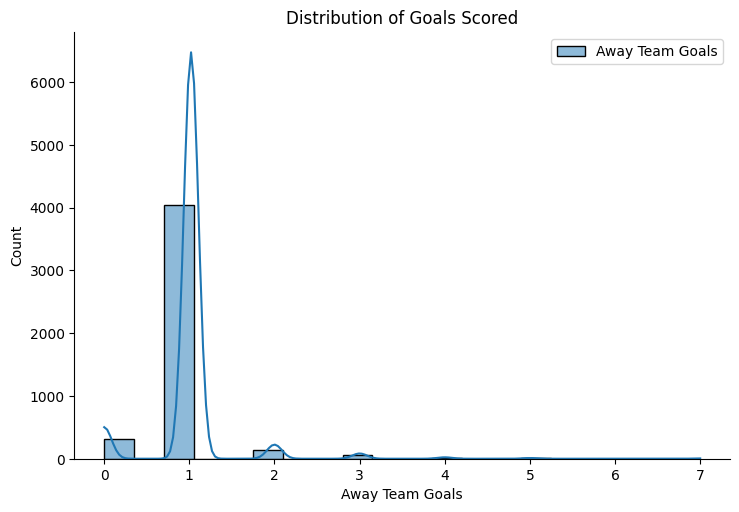

In [22]:
# Distribution plot for goals scored using displot
plt.figure(figsize=(10, 6))
sns.displot(data_mean, x='Home Team Goals', kind='hist', kde=True, bins=20, label='Home Team Goals', aspect=1.5)
sns.displot(data_mean, x='Away Team Goals', kind='hist', kde=True, bins=20, label='Away Team Goals', aspect=1.5)
plt.legend()
plt.title('Distribution of Goals Scored')
plt.show()


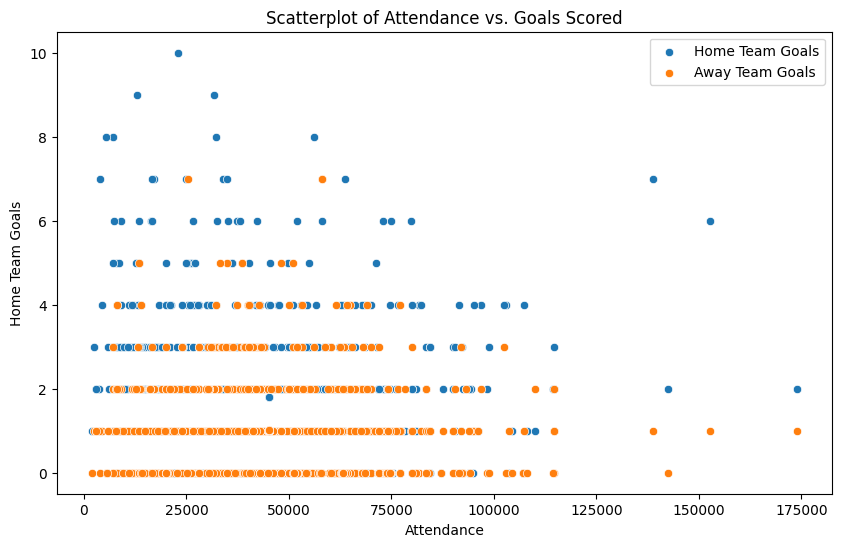

In [23]:
# Scatterplot to visualize relationship between attendance and goals scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Home Team Goals', data=data_mean, label='Home Team Goals')
sns.scatterplot(x='Attendance', y='Away Team Goals', data=data_mean, label='Away Team Goals')
plt.legend()
plt.title('Scatterplot of Attendance vs. Goals Scored')
plt.show()
